In [2]:
# import the usual libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stats

In [3]:
from sodapy import Socrata
client = Socrata("data.virginia.gov", None)
results = client.get("bre9-aqqr", limit=30000)
results_df = pd.DataFrame.from_records(results)

results_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26068 entries, 0 to 26067
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   report_date          26068 non-null  object
 1   fips                 26068 non-null  object
 2   locality             26068 non-null  object
 3   vdh_health_district  26068 non-null  object
 4   total_cases          26068 non-null  object
 5   hospitalizations     26068 non-null  object
 6   deaths               26068 non-null  object
dtypes: object(7)
memory usage: 1.4+ MB


In [4]:
results_df['date'] = pd.to_datetime(results_df['report_date'])
results_df['date_delta'] = (results_df['date'] - results_df['date'].min())  / np.timedelta64(1,'D')

results_df['total_casesI'] = pd.to_numeric(results_df['total_cases'])

total_case_values = results_df['total_casesI'].values
new_cases = []
new_cases.append(0)
for i in range(1,len(results_df)):
    new_cases.append(total_case_values[i]-total_case_values[i-1]) 

results_df['new_cases']=new_cases
results_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26068 entries, 0 to 26067
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   report_date          26068 non-null  object        
 1   fips                 26068 non-null  object        
 2   locality             26068 non-null  object        
 3   vdh_health_district  26068 non-null  object        
 4   total_cases          26068 non-null  object        
 5   hospitalizations     26068 non-null  object        
 6   deaths               26068 non-null  object        
 7   date                 26068 non-null  datetime64[ns]
 8   date_delta           26068 non-null  float64       
 9   total_casesI         26068 non-null  int64         
 10  new_cases            26068 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(7)
memory usage: 2.2+ MB


/usr/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/lib/python3.6/site-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/lib/python3.6/site-packages/ipykernel_launcher.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/in

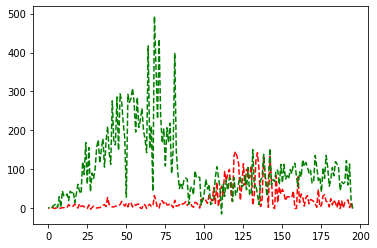

In [5]:
results_df2 = results_df[results_df.locality == 'Norfolk']
#plt.plot(results_df2['date_delta'],results_df2['total_casesI'],'r-')
total_case_values = results_df2['total_casesI'].values
new_cases = []
new_cases.append(0)
for i in range(1,len(results_df2)):
    new_cases.append(total_case_values[i-1]-total_case_values[i]) 
results_df2['new_cases']=new_cases
plt.plot(results_df2['date_delta'],results_df2['new_cases'],'r--')

results_df3 = results_df[results_df.locality == 'Henrico']
#plt.plot(results_df3['date_delta'],results_df3['total_casesI'],'b-')
total_case_values = results_df3['total_casesI'].values
new_cases = []
new_cases.append(0)
for i in range(1,len(results_df3)):
    new_cases.append(total_case_values[i-1]-total_case_values[i]) 
results_df3['new_cases']=new_cases
#plt.plot(results_df3['date_delta'],results_df3['new_cases'],'b--')

results_df4 = results_df[results_df.locality == 'Fairfax']
#plt.plot(results_df4['date_delta'],results_df4['total_casesI'],'g-')
total_case_values = results_df4['total_casesI'].values
new_cases = []
new_cases.append(0)
for i in range(1,len(results_df4)):
    new_cases.append(total_case_values[i-1]-total_case_values[i]) 
results_df4['new_cases']=new_cases
plt.plot(results_df4['date_delta'],results_df4['new_cases'],'g--')

results_df4 = results_df[results_df.locality == 'Newport News']
#plt.plot(results_df4['date_delta'],results_df4['total_casesI'],'g-')
total_case_values = results_df4['total_casesI'].values
new_cases = []
new_cases.append(0)
for i in range(1,len(results_df4)):
    new_cases.append(total_case_values[i-1]-total_case_values[i]) 
results_df4['new_cases']=new_cases
#plt.plot(results_df4['date_delta'],results_df4['new_cases'],'g--')

plt.show()

In [6]:
results_df2.head(30000)

,report_date,fips,locality,vdh_health_district,total_cases,hospitalizations,deaths,date,date_delta,total_casesI,new_cases
118,2020-09-28T00:00:00.000,51710,Norfolk,Norfolk,4840,364,78,2020-09-28,195.0,4840,0
251,2020-09-27T00:00:00.000,51710,Norfolk,Norfolk,4824,364,78,2020-09-27,194.0,4824,16
384,2020-09-26T00:00:00.000,51710,Norfolk,Norfolk,4822,363,78,2020-09-26,193.0,4822,2
517,2020-09-25T00:00:00.000,51710,Norfolk,Norfolk,4800,361,78,2020-09-25,192.0,4800,22
650,2020-09-24T00:00:00.000,51710,Norfolk,Norfolk,4781,356,78,2020-09-24,191.0,4781,19
...,...,...,...,...,...,...,...,...,...,...,...
25521,2020-03-21T00:00:00.000,51710,Norfolk,Norfolk,3,0,0,2020-03-21,4.0,3,0
25654,2020-03-20T00:00:00.000,51710,Norfolk,Norfolk,1,0,0,2020-03-20,3.0,1,2
25787,2020-03-19T00:00:00.000,51710,Norfolk,Norfolk,0,0,0,2020-03-19,2.0,0,1
25920,2020-03-18T00:00:00.000,51710,Norfolk,Norfolk,0,0,0,2020-03-18,1.0,0,0
